# Complex Indexing using Numpy
+ [Overview](#Overview)
+ [Indexing using arrays of indices](#Indexing-using-arrays-of-indices)
+ [Fancy Indexing](#Fancy-Indexing)
+ [Indexing with Boolean Arrays](#Indexing-with-Boolean-Arrays)
+ [Arrays with Structured Data](#Indexing-with-Structured-Data)
+ [Broadcasting](#Broadcasting)
+ [Automatic Reshaping](#Automatic-Reshaping)
+ [Stacking Arrays](#Stacking-Array)
+ [Histograms](#Histograms)
+ [Miscellaneous Operations](#Miscellaneous-Operations)

## Overview
+ Complex indexing operations to access specific elements in an array
+ Working with boolean array generated with conditions
+ Introducing array with structured data a precursor to data frames
+ Working with mismatched array using broadcasting rules

## Indexing using arrays of indices

In [1]:
import numpy as np
a = np.arange(12)**2
print(a)

[  0   1   4   9  16  25  36  49  64  81 100 121]


#### Access value by index

In [2]:
a[2],a[5],a[9]

(4, 25, 81)

#### Access values by array of indices

In [3]:
ind_1 = [2,5,9]
a[ind_1]

array([ 4, 25, 81])

#### Access values by Nd array indices

In [4]:
ind_2 = np.array([[2,5],[7,9]])
a[ind_2]

array([[ 4, 25],
       [49, 81]])

#### Access values by array of an array indices

In [5]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([[0,0],[1,2]])
col = np.array([[0,1],[0,2]])
a[row,col]

array([[ 0,  1],
       [ 4, 10]])

**Output Explain**
+ 0 = a[0][0]
+ 1 = a[0][1]
+ 4 = a[1][0]
+ 10 = a[2][2]

In [7]:
a[row,col] = -1
print(a)

[[-1 -1  2  3]
 [-1  5  6  7]
 [ 8  9 -1 11]]


## Fancy Indexing

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
salary = pd.read_csv('data/hrdata.csv')['Salary'].values

In [10]:
print(salary)

[50000. 65000. 45000. 70000. 48000. 66000.]


In [11]:
type(salary)

numpy.ndarray

In [12]:
salary.shape

(6,)

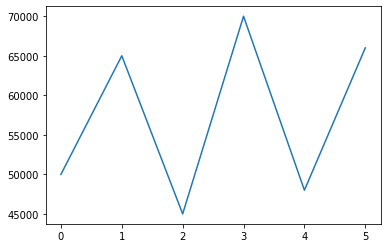

In [13]:
plt.plot(salary)
plt.show()

In [14]:
np.median(salary)

57500.0

In [15]:
np.mean(salary)

57333.333333333336

In [16]:
 #exclude nan
salary = salary[~np.isnan(salary)]

#### Sort

In [17]:
np.sort(salary)

array([45000., 48000., 50000., 65000., 66000., 70000.])

##### Two lowest salary

In [18]:
np.sort(salary)[0:2]

array([45000., 48000.])

##### Two highest salary

In [19]:
np.sort(salary)[-2:]

array([66000., 70000.])

#### Count

In [20]:
np.count_nonzero(salary)

6

##### Salary > 50000

In [21]:
np.count_nonzero(salary[salary>50000])

3

##### Salary < 70000

In [22]:
np.count_nonzero(salary[salary<70000])

5

##### Salary > 50000 AND Salary < 68000

In [23]:
np.count_nonzero((salary>50000) & (salary<68000))

2

## Indexing with Boolean Arrays

In [24]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [25]:
bool_index = a > 10
bool_index

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True,  True]])

In [26]:
a[bool_index]

array([11, 12, 13, 14, 15])

In [27]:
a[a>10]

array([11, 12, 13, 14, 15])

In [28]:
np.count_nonzero(a>10)

5

In [29]:
# count 'True' in boolen index
np.sum(a>10)

5

In [30]:
# 1st row - 0 element with value>10
# 2nd row - 0 element with value>10
# 3rd row - 1 element with value>10
# th row - 2 element with value>10
np.sum(a>10,axis=1)

array([0, 0, 1, 4])

In [31]:
#In array is there any element >10
np.any(a>10)

True

In [32]:
#In array is there any element<0
np.any(a<0)

False

In [33]:
#In row is there any element>10
np.any(a>10,axis=1)

array([False, False,  True,  True])

In [34]:
# Are all the elements > 10
np.all(a>10)

False

In [35]:
# Are all the elements < 20
np.all(a<20)

True

In [36]:
# Are all the elements in row > 10
np.all(a>10,axis=1)

array([False, False, False,  True])

## Indexing with Structured Data

In [37]:
hrdata = pd.read_csv('data/hrdata.csv')
ids = hrdata['Id'].values
name = hrdata['Name'].values
salary = hrdata['Salary'].values
print(ids)
print(name)
print(salary)

[1 2 3 4 5 6]
['Graham Chapman' 'John Cleese' 'Eric Idle' 'Terry Jones' 'Terry Gilliam'
 'Michael Palin']
[50000. 65000. 45000. 70000. 48000. 66000.]


In [38]:
employee_data = np.zeros(6,dtype={'names':('id','name','salary'),
                                  'formats':('i4','U15','f8')})
print(employee_data)

[(0, '', 0.) (0, '', 0.) (0, '', 0.) (0, '', 0.) (0, '', 0.) (0, '', 0.)]


In [39]:
employee_data['id'] = ids
employee_data['name'] = name
employee_data['salary'] = salary

In [40]:
print(employee_data)

[(1, 'Graham Chapman', 50000.) (2, 'John Cleese', 65000.)
 (3, 'Eric Idle', 45000.) (4, 'Terry Jones', 70000.)
 (5, 'Terry Gilliam', 48000.) (6, 'Michael Palin', 66000.)]


In [41]:
employee_data['name']

array(['Graham Chapman', 'John Cleese', 'Eric Idle', 'Terry Jones',
       'Terry Gilliam', 'Michael Palin'], dtype='<U15')

In [42]:
employee_data['id']

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [43]:
#2nd employee
employee_data[1]

(2, 'John Cleese', 65000.)

In [44]:
#2nd employee name
employee_data[1]['name']

'John Cleese'

In [45]:
#last employee salary
employee_data[-1]['salary']

66000.0

In [46]:
employee_data[employee_data['salary']>50000]['name']

array(['John Cleese', 'Terry Jones', 'Michael Palin'], dtype='<U15')

## Broadcasting

Broadcasting in Numpy means how Numpy treats arrays with different shapes during arithmatic operations. Subject to certain constraints, the small array is 'broadcast' across the large array so that they have compatible shapes.

### Broadcasting Scalars

Always broadcaste and independent of the other array in operation

#### Example 1
When we perform below operation, auto broadcaste 10 to perform operation.

In [47]:
a1 = np.array([1,2,3,4,5])
a1 * 10

array([10, 20, 30, 40, 50])

Here Numpy increases the size of an array in below way by making a copy of same element.

In [48]:
a1 = np.array([1,2,3,4,5])
a2 = np.array([10,10,10,10,10])
a1 * a2

array([10, 20, 30, 40, 50])

##### Example 2

In [49]:
a1 = np.arange(12).reshape(3,4)
print(a1*10)

[[  0  10  20  30]
 [ 40  50  60  70]
 [ 80  90 100 110]]


Here numpy broadcaste value in all dimension to perform operations.

In [50]:
a1 = np.arange(12).reshape(3,4)
a2 = np.full((3, 4), 10)
print(a1*a2)

[[  0  10  20  30]
 [ 40  50  60  70]
 [ 80  90 100 110]]


### Broadcasting Arrays

Only broadcaste if the shapes of the two array match.

In [51]:
a1 = np.arange(12).reshape(3,4)
a2 = np.arange(3).reshape(3,1)
print(a1)
print(a2)
print(a1 * a2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0]
 [1]
 [2]]
[[ 0  0  0  0]
 [ 4  5  6  7]
 [16 18 20 22]]


Below operation cannot be performed.

###### Example 1

```python
a1 = np.arange(12).reshape(3,4)
a2 = np.arange(3).reshape(1,3)
print(a1)
print(a2)
print(a1 * a2)
```

###### Example 2

```python
a1 = np.arange(12).reshape(3,4)
a2 = np.arange(2).reshape(2,1)
print(a1)
print(a2)
print(a1 * a2)
```

###### Example 3

```python
a1 = np.arange(12).reshape(3,4)
a2 = np.arange(6).reshape(3,2)
print(a1)
print(a2)
print(a1 * a2)
```

## Automatic Reshaping

In [52]:
a = np.arange(30)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [53]:
# here -1 means we don't know size
a.shape = 2,-1,3

In [54]:
print(a)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]]


Here Numpy converts array in to 2 x 5 x 3 Array 

In [55]:
a.shape

(2, 5, 3)

In [56]:
a.shape = 2,3,-1
print(a)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]


In [57]:
a.shape

(2, 3, 5)

## Stacking Array

### Concating arrays

In [58]:
a = np.arange(0,4,1).reshape(2,2)
b = np.arange(4,8,1).reshape(2,2)
print('A =\n',a)
print('B =\n',b)

A =
 [[0 1]
 [2 3]]
B =
 [[4 5]
 [6 7]]


In [59]:
# Joining two arrays in axis = 0
np.concatenate((a,b))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [60]:
# Joining two arrays in axis = 1
np.concatenate((a,b),axis=1)

array([[0, 1, 4, 5],
       [2, 3, 6, 7]])

### Stacking arrays

In [61]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])

In [62]:
np.stack((a,b))

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [63]:
np.stack((a,b),axis = 1)

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [64]:
hrdata = pd.read_csv('data/hrdata.csv')
ids = hrdata['Id'].values
name = hrdata['Name'].values
salary = hrdata['Salary'].values
print(ids)
print(name)
print(salary)

[1 2 3 4 5 6]
['Graham Chapman' 'John Cleese' 'Eric Idle' 'Terry Jones' 'Terry Gilliam'
 'Michael Palin']
[50000. 65000. 45000. 70000. 48000. 66000.]


In [65]:
s = np.stack((ids,name,salary))
print(s)
print(s.shape)

[[1 2 3 4 5 6]
 ['Graham Chapman' 'John Cleese' 'Eric Idle' 'Terry Jones'
  'Terry Gilliam' 'Michael Palin']
 [50000.0 65000.0 45000.0 70000.0 48000.0 66000.0]]
(3, 6)


In [66]:
s = np.stack((ids,name,salary),axis=1)
print(s)
print(s.shape)

[[1 'Graham Chapman' 50000.0]
 [2 'John Cleese' 65000.0]
 [3 'Eric Idle' 45000.0]
 [4 'Terry Jones' 70000.0]
 [5 'Terry Gilliam' 48000.0]
 [6 'Michael Palin' 66000.0]]
(6, 3)


In [67]:
s = np.vstack((ids,name,salary))
print(s)
print(s.shape)

[[1 2 3 4 5 6]
 ['Graham Chapman' 'John Cleese' 'Eric Idle' 'Terry Jones'
  'Terry Gilliam' 'Michael Palin']
 [50000.0 65000.0 45000.0 70000.0 48000.0 66000.0]]
(3, 6)


In [68]:
s = np.hstack((ids,name,salary))
print(s)
print(s.shape)

[1 2 3 4 5 6 'Graham Chapman' 'John Cleese' 'Eric Idle' 'Terry Jones'
 'Terry Gilliam' 'Michael Palin' 50000.0 65000.0 45000.0 70000.0 48000.0
 66000.0]
(18,)


## Histograms

In [69]:
np.histogram([1,2,1,0,1,2,0,2,1,3],bins=[0,1,2,3])

(array([2, 4, 4]), array([0, 1, 2, 3]))

Here,\
    0 - 2 times\
    1 - 4 times\
    2 - 4 times\
    3 - none

In [70]:
data = np.random.randint(1,50,size=10000)
print(data)

[13 24 20 ... 26 22  5]


In [71]:
(n,edges) = np.histogram(data,bins=50)

In [72]:
print(n)

[197 209 185 208 213 230 218 190 221 216 203 207 228 179 202 206 200 222
 189 222 206 190 213 170   0 222 204 170 225 233 208 212 206 184 211 188
 200 211 185 203 206 191 193 195 179 204 198 232 213 203]


In [73]:
print(edges)

[ 1.    1.96  2.92  3.88  4.84  5.8   6.76  7.72  8.68  9.64 10.6  11.56
 12.52 13.48 14.44 15.4  16.36 17.32 18.28 19.24 20.2  21.16 22.12 23.08
 24.04 25.   25.96 26.92 27.88 28.84 29.8  30.76 31.72 32.68 33.64 34.6
 35.56 36.52 37.48 38.44 39.4  40.36 41.32 42.28 43.24 44.2  45.16 46.12
 47.08 48.04 49.  ]


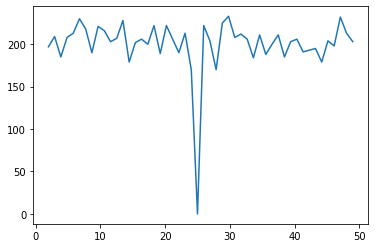

In [74]:
plt.plot(edges[1:],n)
plt.show()

## Miscellaneous Operations

In [75]:
#returns the indices of minimum value along the axis
np.argmin(data)

101

In [76]:
#returns the indices of maximum value along the axis
np.argmax(data)

8

In [77]:
#first index has lowest value....last index has highest value
np.argsort(data)

array([6770,  233, 1620, ..., 8505, 8277, 2252])

In [78]:
#first index has lowest value....last index has highest value....sort using mergersort
np.argsort(data,kind='mergesort')

array([ 101,  155,  181, ..., 9806, 9873, 9937])

In [79]:
#display all values in sorted order
data[np.argsort(data)]

array([ 1,  1,  1, ..., 49, 49, 49])

In [80]:
print(np.where(data>25))

(array([   4,    5,    7, ..., 9995, 9996, 9997]),)


In [81]:
len(np.where(data>25)[0])

4854

In [82]:
data[np.where(data>25)]

array([37, 28, 30, ..., 39, 36, 26])

In [83]:
condition = data>np.mean(data)
np.extract(condition,data)

array([37, 28, 30, ..., 39, 36, 26])